In [1]:
from __future__ import division
import numpy as np
%matplotlib inline
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
from rasterio.plot import show

[[-- -- -- ..., 42 42 42]
 [-- -- -- ..., 42 42 42]
 [-- -- -- ..., 41 42 42]
 ..., 
 [130 130 129 ..., 130 130 131]
 [130 130 129 ..., 131 130 130]
 [130 130 129 ..., 131 131 130]]


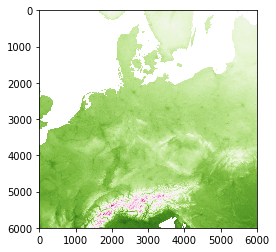

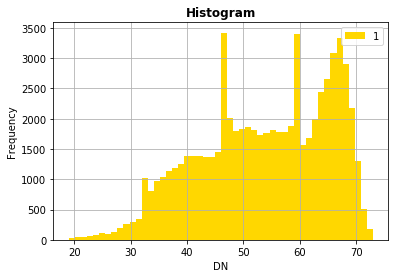

In [24]:
with rasterio.open('/Users/Ben/Downloads/eurolst_clim/eurolst_clim.bio01.tif', blockxsize=256, blockysize=256) as inData:
    window = (6000, 12000), (6000, 12000)
    window2 = (6000, 8000), (6000, 8000)
    profile = inData.profile
    cmap = plt.get_cmap('PiYG')
    dslice = inData.read(1, window=window, masked=False)
    print(inData.read(1, window=window, masked=True))
    show(inData.read(1, window=window, masked=True), cmap=cmap, interpolation='none')
    show_hist(inData.read(1, window=window2, masked=True), bins=50, stacked=False, alpha=1, histtype='stepfilled', title="Histogram")
    

In [14]:
dslice[dslice == -32768] = 0

In [42]:
# Need to re-center to have the minimum temp be at value 1, and maximum be at 255 (if greater than 255...)

missing = -32768
int8_max = 255  # 0-255 values represented by 8 bit integer

minval = dslice[dslice != missing].min()
maxval = dslice[dslice != missing].max()

data_range = maxval - minval

print("Min temp. = {0}, Max temp = {1} (degrees*10)".format(minval, maxval))
print("Data range = {0}".format(data_range))
# Can set from data range or can set from sensible physical values...

step = 255/data_range
print("STEP = {}".format(step))

# Set new values: all values stretched b/w 1 and 255

# Last step, is to set missing value to 0

# Create cartocss mapping....

Min temp. = -99, Max temp = 162 (degrees*10)
Data range = 261
STEP = 0.9770114942528736


In [18]:
def convert_value(oldValue, oldMax, oldMin, missing_value=None):
    """
    e.g. set 300  # e.g. from +30.0 degrees (300),
    and-300 # to -30 degrees (-300)
    """
    if missing_value != oldValue:
        newMin = 1
        newMax = 255
        oldRange = oldMax - oldMin 
        newRange = newMax - newMin 
        newValue = (((oldValue - oldMin) * newRange) / oldRange) + newMin
        x = int(newValue)
        assert x >= newMin or x <= newMax,'Not valid!'
    elif missing_value == oldValue:
        return(int(0))

f = np.vectorize(convert_value)
    
#convert_value(-98, oldMax=maxval, oldMin=minval, missing_value = -99)

In [13]:
convert_value(-99, oldMax=-99, oldMin=162, missing_value = -99)

0

In [ ]:
# make range from old min to max - or all unique values
# translate each to key value
# make a mask witgh them
# place related value into a new array

In [180]:
t2.astype('uint8')

array([[  0,   0,   0, ..., 138, 138, 138],
       [  0,   0,   0, ..., 138, 138, 138],
       [  0,   0,   0, ..., 137, 138, 138],
       ..., 
       [223, 223, 222, ..., 223, 223, 224],
       [223, 223, 222, ..., 224, 223, 223],
       [223, 223, 222, ..., 224, 224, 223]], dtype=uint8)

In [182]:
print('oldmax', maxval)
print('oldmin', minval,)
print('newMin', 1)
print('newMax', 255,)
print('oldRange' , maxval - minval) 
print('newRange' , 255 - 1) 

newValue = (((oldValue - minval) * newRange) / oldRange) + newMin

oldmax 162
oldmin -99
newMin 1
newMax 255
oldRange 261
newRange 254


In [190]:
convert_value(99.20, oldMax=maxval, oldMin=minval, missing_value = -99)

193

In [104]:
from tqdm import tqdm

In [117]:
%%time

test = []
for row in tqdm(range(len(dslice[:,0]))):
    test.append(f(dslice[row,:], oldMax=maxval, oldMin=minval, missing_value = -32768))

t2 = np.array(test)

100%|██████████| 6000/6000 [02:58<00:00, 33.53it/s]

CPU times: user 2min 52s, sys: 4.27 s, total: 2min 57s
Wall time: 2min 58s


In [135]:
%%time

tout = f(dslice, oldMax=maxval, oldMin=minval, missing_value = -32768)


CPU times: user 2min 58s, sys: 3.77 s, total: 3min 2s
Wall time: 3min 10s


In [136]:
t2.astype?

In [138]:
profile['nodata']

-32768.0

In [140]:
import time

In [164]:
now = time.clock()

In [170]:
later = time.clock()



print('Ran in {0:4.2f}'.format(later-now))

Ran in 0.09


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook

In [ ]:
with rasterio.open('/Users/Ben/Downloads/eurolst_clim/small_eurolst.tif') as src:
    print(src.width, src.height)
    print(src.crs)
    print(src.transform)
    print(src.count)
    print(src.indexes)
    profile = src.profile
    band = src.read(1, masked=True)

In [ ]:
profile

In [ ]:
band.shape

In [ ]:
np.min(band)

In [ ]:
np.max(band)

In [ ]:
np.average(band)

In [ ]:
band

In [ ]:
band

In [ ]:
plt.imshow(src.read(1))# cmap=cm.gist_earth)
plt.show()

In [ ]:
np.min(band)

In [ ]:
np.max(band)

In [ ]:
band

In [ ]:
profile

In [ ]:
np.mean(band[bmask])

In [ ]:
np.max(band[bmask])

In [ ]:
np.min(band[bmask])

In [ ]:
band[bmask].shape